## HW 5
Botasheva Zhanna

## Откуда берутся датасеты? Практический проект по сбору данных и работе с текстами

### Часть 1. Парсинг

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для времени

In [3]:
page_link = 'https://www.ivi.ru/collections/serialy-s-vyisokim-rejtingom'

In [4]:
# подгрузим один из методов этой библиотеки
from fake_useragent import UserAgent

In [5]:
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'

In [6]:
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [7]:
type(response)

requests.models.Response

In [8]:
html = response.content

In [9]:
html[:1000]

b'<!DOCTYPE html><html lang="ru" prefix="og: https://ogp.me/ns# video: http://ogp.me/ns/video# ya: https://webmaster.yandex.ru/vocabularies/"><head><base href="https://www.ivi.ru/"/><script type="text/javascript">\n                        (function(m,e,t,r,i,k,a){m[i]=m[i]||function(){(m[i].a=m[i].a||[]).push(arguments)};\n                        m[i].l=1*new Date();\n                        for (var j = 0; j < document.scripts.length; j++) {if (document.scripts[j].src === r) { return; }}\n                        k=e.createElement(t),a=e.getElementsByTagName(t)[0],k.async=1,k.src=r,a.parentNode.insertBefore(k,a)})\n                        (window, document, "script", "https://mc.yandex.ru/metrika/tag.js", "ym");\n        \n                        ym(89754140, "init", {\n                            clickmap:true,\n                            trackLinks:true,\n                            accurateTrackBounce:true\n                        });\n                    </script><noscript><div><i

In [10]:
html[-1000:]

b'":"","passwordResetParams":null,"loginChangeAllowed":false,"authAction":null,"authType":null,"code":"","returnStep":null,"codeDevice":"","profileData":null,"phoneAuthenticationMethod":"sms","isLoginFromMenu":false,"backRoute":""},"buy":{"initPsKey":null,"initPsMethod":null,"initPsAccountId":null,"phone":"","subscriptionId":null},"certificate":{"key":""},"navigationBar":{"title":"","subtitle":"","prevTitle":"","initSubtitle":"","totalStepsInScenario":null},"contacts":{"contactType":"email","contactValue":"","availableContactValue":null,"numberOfAttempts":null,"availableMerge":false,"mode":"bind"},"needAcceptOferta":false,"reloadOnClose":false},"catalog":{"pages":{"1":{"index":1,"items":[16784,16935,17317,17109,17338,14194,16861,17162,17325,17240,16974,15277,14241,15730,17078,16648,17406,16525,17324,17417,17365,17086,16283,15293,17405,16790,17279,16284,15440,17322],"status":"success"}},"initialPage":1,"itemsCount":436,"itemsPerRow":7}}</script><div id="footer-assets"></div></body></htm

In [11]:
len(html)

559595

In [12]:
type(html)

bytes

Готовим суп))

In [13]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(html, 'html.parser') # В опции также можно указать lxml,
                                         # если предварительно установить одноименный пакет

In [15]:
type(soup)

bs4.BeautifulSoup

In [16]:
print(soup.prettify()[:3000])

<!DOCTYPE html>
<html lang="ru" prefix="og: https://ogp.me/ns# video: http://ogp.me/ns/video# ya: https://webmaster.yandex.ru/vocabularies/">
 <head>
  <base href="https://www.ivi.ru/"/>
  <script type="text/javascript">
   (function(m,e,t,r,i,k,a){m[i]=m[i]||function(){(m[i].a=m[i].a||[]).push(arguments)};
                        m[i].l=1*new Date();
                        for (var j = 0; j < document.scripts.length; j++) {if (document.scripts[j].src === r) { return; }}
                        k=e.createElement(t),a=e.getElementsByTagName(t)[0],k.async=1,k.src=r,a.parentNode.insertBefore(k,a)})
                        (window, document, "script", "https://mc.yandex.ru/metrika/tag.js", "ym");
        
                        ym(89754140, "init", {
                            clickmap:true,
                            trackLinks:true,
                            accurateTrackBounce:true
                        });
  </script>
  <noscript>
   <div>
    <img alt="" src="https://mc.yandex

In [17]:
soup.html.head.title

<title>Сериалы с высоким рейтингом по подписке смотреть онлайн подборку. Список лучшего контента в HD качестве</title>

In [18]:
type(soup.html.head.title)

bs4.element.Tag

In [19]:
soup.html.head.title.text

'Сериалы с высоким рейтингом по подписке смотреть онлайн подборку. Список лучшего контента в HD качестве'

In [20]:
type(soup.html.head.title.text)

str

In [21]:
obj = soup.find('a', attrs = {'class':'nbl-slimPosterBlock'})
obj

<a class="nbl-slimPosterBlock nbl-slimPosterBlock_type_poster nbl-slimPosterBlock_iconStatus_none nbl-slimPosterBlock_available collections__nbl-slimPosterBlock" data-content-id="16784" href="/watch/zolotoe-dno" to="/watch/zolotoe-dno"><div class="nbl-slimPosterBlock__imageSection"><div class="nbl-poster nbl-poster_type_poster nbl-poster_extrasMode_rusk nbl-slimPosterBlock__nbl-poster"><div class="nbl-poster__imageWrapper"><picture><source media="(min-width: 1272px)" srcset="https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/153x235/?q=85 1x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/230x353/?q=85 1.5x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/306x470/?q=85 2x"/><source media="(min-width: 1096px)" srcset="https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/181x278/?q=85 1x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd

In [22]:
obj.get("class")

['nbl-slimPosterBlock',
 'nbl-slimPosterBlock_type_poster',
 'nbl-slimPosterBlock_iconStatus_none',
 'nbl-slimPosterBlock_available',
 'collections__nbl-slimPosterBlock']

In [23]:
obj.attrs['href']

'/watch/zolotoe-dno'

In [24]:
print("Тип данных до вытаскивания ссылки:", type(obj))
print("Тип данных после вытаскивания ссылки:", type(obj.attrs['href']))

Тип данных до вытаскивания ссылки: <class 'bs4.element.Tag'>
Тип данных после вытаскивания ссылки: <class 'str'>


In [25]:
film_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['nbl-slimPosterBlock',
 'nbl-slimPosterBlock_type_poster',
 'nbl-slimPosterBlock_iconStatus_none',
 'nbl-slimPosterBlock_available',
 'collections__nbl-slimPosterBlock'])
film_links[:3]

[<a class="nbl-slimPosterBlock nbl-slimPosterBlock_type_poster nbl-slimPosterBlock_iconStatus_none nbl-slimPosterBlock_available collections__nbl-slimPosterBlock" data-content-id="16784" href="/watch/zolotoe-dno" to="/watch/zolotoe-dno"><div class="nbl-slimPosterBlock__imageSection"><div class="nbl-poster nbl-poster_type_poster nbl-poster_extrasMode_rusk nbl-slimPosterBlock__nbl-poster"><div class="nbl-poster__imageWrapper"><picture><source media="(min-width: 1272px)" srcset="https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/153x235/?q=85 1x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/230x353/?q=85 1.5x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/306x470/?q=85 2x"/><source media="(min-width: 1096px)" srcset="https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8fd5ce870a3e42e8b.jpg/181x278/?q=85 1x, https://thumbs.dfs.ivi.ru/storage23/contents/9/d/d4127102d75bf8f

In [26]:
len(film_links)

30

In [27]:
film_links = [link.attrs['href'] for link in film_links]

In [28]:
film_links[:10]

['/watch/zolotoe-dno',
 '/watch/zimorodok',
 '/watch/sovershenno-drugoj',
 '/watch/klyukvennyij-scherbet',
 '/watch/spryach-menya',
 '/watch/nezhnost',
 '/watch/semya-2023',
 '/watch/etot-gorod-posleduet-za-toboj',
 '/watch/dikij',
 '/watch/sama-vinovata']

In [29]:
def getPageLinks(page_number):
    """
        Возвращает список ссылок на мемы, полученный с текущей страницы

        page_number: int/string
            номер страницы для парсинга

    """
    # составляем ссылку на страницу поиска
    page_link = 'https://www.ivi.ru/collections/serialy-s-vyisokim-rejtingom/page{}'.format(page_number)

    # запрашиваем данные по ней
    response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем пустой лист для текущей страницы
        return []

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # наконец, ищем ссылки на мемы и очищаем их от ненужных тэгов
    film_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['nbl-slimPosterBlock',
 'nbl-slimPosterBlock_type_poster',
 'nbl-slimPosterBlock_iconStatus_none',
 'nbl-slimPosterBlock_available',
 'collections__nbl-slimPosterBlock'])
    film_links = ['https://www.ivi.ru' + link.attrs['href'] for link in film_links]

    return film_links

In [30]:
film_links = getPageLinks(1)
film_links[:2]

['https://www.ivi.ru/watch/zolotoe-dno', 'https://www.ivi.ru/watch/zimorodok']

In [31]:
film_page = 'https://www.ivi.tv/watch/nezhnost'
response = requests.get(film_page, headers={'User-Agent': UserAgent().chrome})

html = response.content
soup = BeautifulSoup(html,'html.parser')

In [32]:
raiting = soup.find(attrs={'class':'nbl-ratingPlate__value'})
raiting

<div class="nbl-ratingPlate__value">8,6</div>

In [33]:
type(raiting)

bs4.element.Tag

In [34]:
raiting = raiting.string
type(raiting)

bs4.element.NavigableString

In [35]:
numberofraitings = soup.find(attrs={'class':'ratingBlock__extra'})
numberofraitings

<div class="ratingBlock__extra">187 633 оценки</div>

In [36]:
numberofraitings = numberofraitings.string
type(str(numberofraitings))

str

In [37]:
numberofraitings

'187 633 оценки'

In [38]:
numberofraitings = numberofraitings.split()[:-1]

In [39]:
type(numberofraitings)

list

In [40]:
numberofraitings = int(''.join(numberofraitings))
numberofraitings

187633

In [41]:
def getStats(soup, stats):
    """
        Возвращает очищенное число просмотров/коментариев/...

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

        stats: string
            views/videos/photos/comments

    """
    try:
        obj = soup.find(attrs={'class':stats})
        obj = obj.string
        obj = int(obj.replace(',', ''))
        #obj = obj.split()[:-1]
        #obj = int(''.join(obj))
    except:
        obj=None

    return obj

In [42]:
def getNumberofraitings(soup, stats1):
    """
        Возвращает очищенное число просмотров/коментариев/...

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

        stats: string
            views/videos/photos/comments

    """
    try:
        obj = soup.find(attrs={'class':stats1})
        obj = obj.string
        obj = obj.split()[:-1]
        obj = int(''.join(obj))
    except:
        obj=None

    return obj

In [43]:
raiting = getStats(soup, stats='nbl-ratingPlate__value')
numberofraitings = getNumberofraitings(soup, stats1='ratingBlock__extra')
reviews = getStats(soup, stats='nbl-superscript__text')

print("Рейтинг: {}\nКоличество оценок: {}\nОтзывы: {}\n".format(raiting, numberofraitings, reviews))

Рейтинг: 86
Количество оценок: 187633
Отзывы: 308



In [44]:
#type(raiting)
type(numberofraitings)
#type(reviews)

int

In [45]:
year = soup.find(attrs={'class':'nbl-link nbl-link_style_wovou'})
year

<a class="nbl-link nbl-link_style_wovou" href="https://www.ivi.ru/series/2020">2020-2024</a>

In [46]:
type(year)

bs4.element.Tag

In [47]:
year = year.string

In [48]:
type(year)

bs4.element.NavigableString

In [49]:
year

'2020-2024'

In [50]:
year = str(year)
type(year)

str

In [51]:
year

'2020-2024'

In [52]:
def getText(soup):
    """
        Возвращает текстовые описания фильма

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

    """
    # название фильма
    film_name = soup.find('h1', attrs={'class':['watchTitle__title', 'font-1160-42-44 font-600-50-50 font-320-32-36']}).text.strip()
    film_name = str(film_name)
    #film_name = film_name.split()[1]
    #film_name = soup.find('span', attrs={'class':'nbl-slimPosterBlock__titleText'}).find('h1').text.strip()
     
    # достаём описание
    film_about = soup.find('div', attrs={'class':'clause__text-inner'}).text.strip()

    # раздел about (если он есть), должен идти первым, берем его без уточнения класса
    #meme_about = body.find('p')
    #meme_about = "" if not meme_about else meme_about.text

    # раздел origin можно найти после заголовка Origin или History,
    # находим заголовок, определяем родителя и ищем следущего ребенка - наш раздел
    #meme_origin = body.find(text='Origin') or body.find(text='History')
    #meme_origin = "" if not meme_origin else meme_origin.parent.find_next().text

    # весь остальной текст (если он есть) можно запихнуть в одно текстовое поле
    #if body.text:
        #other_text = body.text.strip().split('\n')[4:]
        #other_text = " ".join(other_text).strip()
   # else:
       # other_text = ""

    return {'Название': film_name, 'Описание':film_about}

In [53]:
text_fields = getText(soup)

print("Название фильма:\n{}\n\nОписание:\n{}\n\n".format(text_fields['Название'], text_fields['Описание']))

Название фильма:
Нежность (Сериал 2020)

Описание:
Финансовый директор крупной компании Елена Ивановна Подберезкина во время спонтанной поездки в Санкт-Петербург неожиданно встречает мужчину своей мечты и так же неожиданно его теряет. Поиски придется начинать с нуля, и теперь в ход идет всё: дедукция, эзотерика, помощь подруг, знакомство с новым мужчиной, ретрит и многое другое. Продолжение нашумевшей короткометражки 2018 года режиссера Анны Меликян. К главным ролям возвращаются Виктория Исакова и Евгений Цыганов. С ранних лет Елена Ивановна «шла по жизни маршем»: с пугающей целеустремленностью взбиралась по карьерной лестнице, не размениваясь на романтику и отношения. Так было всегда – вплоть до одного случайного, странного, самого счастливого знакомства. В новых эпизодах Елена Ивановна возобновляет поиски утраченного, пользуясь всеми доступными и недоступными способами. Она бежит сломя голову, ошибается, падает, но продолжает движение на этом непростом пути, где ищет любовь и нежност

In [54]:
def getFilmData(film_page):
    """
        Запрашивает данные по странице, возвращает обработанный словарь с данными

        film_page: string
            ссылка на страницу с фильмом

    """

    # запрашиваем данные по ссылке
    response = requests.get(film_page, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем статус ошибки
        return response.status_code

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # используя ранее написанные функции парсим информацию
    # views = getStats(soup=soup, stats='views')
    # videos = getStats(soup=soup, stats='videos')
    #photos = getStats(soup=soup, stats='photos')
   # comments = getStats(soup=soup, stats='comments')
    
    raiting = getStats(soup=soup, stats='nbl-ratingPlate__value')
    numberofraitings = getNumberofraitings(soup=soup, stats1='ratingBlock__extra')
    reviews = getStats(soup=soup, stats='nbl-superscript__text')

    # дата
    #date = soup.findAll('abbr', attrs={'class':'timeago'})[1].attrs['title']

    # текстовые поля
    text_fileds = getText(soup=soup)

    # составляем словарь, в котором будут хранится все полученные и обработанные данные
    data_row = {"Рейтинг":raiting, "Кол-во оценок":numberofraitings, "Отзывы":reviews}
    data_row.update(text_fileds)

    return data_row

In [55]:
data_row = getFilmData('https://www.ivi.tv/watch/nezhnost')

In [56]:
data_row

{'Рейтинг': 86,
 'Кол-во оценок': 187633,
 'Отзывы': 308,
 'Название': 'Нежность (Сериал 2020)',
 'Описание': 'Финансовый директор крупной компании Елена Ивановна Подберезкина во время спонтанной поездки в Санкт-Петербург неожиданно встречает мужчину своей мечты и так же неожиданно его теряет. Поиски придется начинать с нуля, и теперь в ход идет всё: дедукция, эзотерика, помощь подруг, знакомство с новым мужчиной, ретрит и многое другое. Продолжение нашумевшей короткометражки 2018 года режиссера Анны Меликян. К главным ролям возвращаются Виктория Исакова и Евгений Цыганов. С ранних лет Елена Ивановна «шла по жизни маршем»: с пугающей целеустремленностью взбиралась по карьерной лестнице, не размениваясь на романтику и отношения. Так было всегда – вплоть до одного случайного, странного, самого счастливого знакомства. В новых эпизодах Елена Ивановна возобновляет поиски утраченного, пользуясь всеми доступными и недоступными способами. Она бежит сломя голову, ошибается, падает, но продолжае

In [57]:
final_df = pd.DataFrame(columns=['Название',  'Рейтинг', 'Кол-во оценок', 'Отзывы', 'Описание'])

In [58]:
#final_df = final_df.np.concat(data_row, ignore_index=True).dropna(axis = 1)
#final_df
#df = pd.DataFrame(df).append(new_row, ignore_index=True)
final_df = pd.concat([final_df, pd.DataFrame([data_row])], ignore_index=True)
final_df

,Название,Рейтинг,Кол-во оценок,Отзывы,Описание
0,Нежность (Сериал 2020),86,187633,308,Финансовый директор крупной компании Елена Ива...


In [59]:
from tqdm import tqdm_notebook

In [60]:
film_links

['https://www.ivi.ru/watch/zolotoe-dno',
 'https://www.ivi.ru/watch/zimorodok',
 'https://www.ivi.ru/watch/sovershenno-drugoj',
 'https://www.ivi.ru/watch/klyukvennyij-scherbet',
 'https://www.ivi.ru/watch/spryach-menya',
 'https://www.ivi.ru/watch/nezhnost',
 'https://www.ivi.ru/watch/semya-2023',
 'https://www.ivi.ru/watch/etot-gorod-posleduet-za-toboj',
 'https://www.ivi.ru/watch/dikij',
 'https://www.ivi.ru/watch/sama-vinovata',
 'https://www.ivi.ru/watch/blesk',
 'https://www.ivi.ru/watch/velikolepnyij-vek',
 'https://www.ivi.ru/watch/love-is-in-the-air',
 'https://www.ivi.ru/watch/protiv-vseh',
 'https://www.ivi.ru/watch/esli-silno-polyubish',
 'https://www.ivi.ru/watch/pravosudie-2021',
 'https://www.ivi.ru/watch/kriminalnyij-doktor',
 'https://www.ivi.ru/watch/pes',
 'https://www.ivi.ru/watch/moya-prekrasnaya-zhizn',
 'https://www.ivi.ru/watch/bukinyi',
 'https://www.ivi.ru/watch/borchi',
 'https://www.ivi.ru/watch/dobrota',
 'https://www.ivi.ru/watch/rannyaya-ptashka',
 'https

In [61]:
for film_link in tqdm_notebook(film_links):
    try:
        data_row = getFilmData(film_link)
        final_df = pd.concat([final_df, pd.DataFrame([data_row])], ignore_index=True)
        time.sleep(0.3)
    except:
        continue

  0%|          | 0/30 [00:00<?, ?it/s]

In [62]:
final_df = final_df.drop_duplicates().dropna(axis = 1)

In [63]:
final_df.shape

(30, 4)

In [64]:
final_df.head(30)

,Название,Рейтинг,Кол-во оценок,Описание
0,Нежность (Сериал 2020),86,187633,Финансовый директор крупной компании Елена Ива...
1,Золотое дно (сериал 2024),84,14753,Несколько поколений богатой династии делят биз...
2,Зимородок (сериал 2022) смотреть онлайн,79,328101,Красавец и ловелас Ферит вырос в богатой семье...
3,Совершенно другой (турецкий сериал),83,26313,Известный журналист Кенан влюбляется в девушку...
4,Клюквенный щербет (сериал 2022),80,56153,Двое влюблённых из очень разных семей борются ...
5,Спрячь меня (Сериал 2023),78,23190,Наз планирует будущее со своим давним возлюбле...
7,Семья (турецкий сериал 2023),83,74572,Один из самых ожидаемых турецких сериалов 2023...
8,Этот город последует за тобой (Сериал 2017),81,1694,"В детстве Али пережил тяжёлую травму, став сви..."
9,Дикий (турецкий сериал),81,9988,"В детстве Яман Али потерял семью, и ему пришло..."
10,Сама виновата? (сериал 2023),88,45613,"Реальная история, шокировавшая страну: драма о..."


In [65]:
# Немного красивых циклов. При желании пакет можно отключить и
# удалить команду tqdm_notebook из всех циклов
from tqdm import tqdm_notebook


final_df = pd.DataFrame(columns=['Название',  'Рейтинг', 'Кол-во оценок', 'Отзывы', 'Описание'])

for page_number in tqdm_notebook(range(10), desc='Pages'):
    # собрали хрефы с текущей страницы
    film_links = getPageLinks(page_number+1)
    for film_link in tqdm_notebook(film_links, desc='Films', leave=False):
        # иногда с первого раза страничка не парсится
        for i in range(3):
            try:
                # закидываем её в таблицу
                #final_df = final_df.append(data_row, ignore_index=True)
                data_row = getFilmData(film_link)
                final_df = pd.concat([final_df, pd.DataFrame([data_row])], ignore_index=True)
                # если всё получилось - выходим из внутреннего цикла
                break
            except:
                # Иначе, пробуем еще несколько раз, пока не закончатся попытки
                print('AHTUNG! parsing once again:', film_link)
                continue
            time.sleep(0.3)

Pages:   0%|          | 0/10 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

Films:   0%|          | 0/30 [00:00<?, ?it/s]

In [66]:
final_df

,Название,Рейтинг,Кол-во оценок,Отзывы,Описание
0,Золотое дно (сериал 2024),84,14753,21,Несколько поколений богатой династии делят биз...
1,Зимородок (сериал 2022) смотреть онлайн,79,328101,226,Красавец и ловелас Ферит вырос в богатой семье...
2,Совершенно другой (турецкий сериал),83,26313,33,Известный журналист Кенан влюбляется в девушку...
3,Клюквенный щербет (сериал 2022),80,56153,21,Двое влюблённых из очень разных семей борются ...
4,Спрячь меня (Сериал 2023),78,23190,21,Наз планирует будущее со своим давним возлюбле...
...,...,...,...,...,...
295,Красная манжета (Дорама),88,7967,11,История неравной любви в королевском дворце Чо...
296,Угрюм-река (Сериал 2020),78,44715,66,"Рассказ о семье, пережившей период с XIX по XX..."
297,Сериал Мерлин,85,12290,2,Юный волшебник Мерлин приезжает в королевство ...
298,Догоняя смерть (Сериал 2019),75,11937,12,В израильском заповеднике обнаруживают три чел...


In [67]:
final_df.shape

(300, 5)

In [68]:
final_df = final_df.drop_duplicates().dropna(axis = 1)

In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Название  300 non-null    object
 1   Рейтинг   300 non-null    object
 2   Описание  300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


### Часть 2. NLP

In [70]:
%matplotlib inline
! pip install pymorphy2
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

### Часть 2. NLP

In [84]:
import nltk   # Natural Language Toolkit
from nltk.corpus import stopwords
from string import punctuation
from pymystem3 import Mystem

In [85]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

# примеры стоп-слов
print(len(stop_words))
print(stop_words[:10])

151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


[nltk_data] Downloading package stopwords to C:\Users\Zhanna
[nltk_data]     Botasheva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
#создадим функцию, которая будет осуществлять предобработку текста
mystem = Mystem() 

def lemmatize_and_filter(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words \
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

Installing mystem to C:\Users\Zhanna Botasheva/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


In [87]:
#Проверим работу функции на одной строке
final_df['Описание'].values[0]

'Несколько поколений богатой династии делят бизнес, власть и миллиарды. Как далеко способны зайти наследники? Гораздо дальше, чем они сами думали. Ироничная драма Сергея Минаева о семье и жадности. Сериал собрал роскошную актёрскую команду, в которую вошли Алексей Гуськов, Юлия Снигирь, Игорь Гордин и другие звёзды.Многомиллионная корпорация остаётся без лидера, и начинается большая грызня. Семья олигарха Градова, его заклятый бизнес-партнёр и любовница развязывают войну за наследство. В ход идёт всё: шпионаж, шантаж, соблазнение, угрозы, интриги... Чем дальше, тем сложнее остановиться. Теперь это не просто бизнес, а личное дело для всех наследников, теряющих грань между врагами и своими. Здесь больше никому нельзя верить.Смотри онлайн вместе с Иви стильную семейную сагу о закулисье роскоши и больших денег «Золотое дно». Приглашаем посмотреть сериал «Золотое дно» в нашем онлайн-кинотеатре совершенно бесплатно в хорошем HD качестве. Приятного просмотра!'

In [88]:
lemmatize_and_filter(final_df['Описание'].values[0])

'несколько поколение богатый династия делить бизнес власть миллиард далеко способный зайти наследник гораздо далеко думать ироничный драма сергей минаев семья жадность сериал собирать роскошный актерский команда который входить алексей гуськов юлия снигирь игорь гордин звезда многомиллионный корпорация оставаться лидер начинаться большой грызня семья олигарх градов заклятый бизнес партнер любовница развязывать война наследство ход идти шпионаж шантаж соблазнение угроза интрига ... далеко сложно останавливаться это просто бизнес личный дело весь наследник терять грань враг свой никто верить смотреть онлайн вместе иви стильный семейный сага закулисье роскошь большой деньги  « золотой дно » приглашать посмотреть сериал  « золотой дно »  наш онлайн кинотеатр совершенно бесплатно хороший hd качество приятный просмотр'

In [89]:
#Сделаем теперь предобработку для всего датасета.
data_preprocessed = final_df.copy()
data_preprocessed['Описание'] = final_df['Описание'].apply(lambda text: lemmatize_and_filter(text))
data_preprocessed['Описание'].values[0]

'несколько поколение богатый династия делить бизнес власть миллиард далеко способный зайти наследник гораздо далеко думать ироничный драма сергей минаев семья жадность сериал собирать роскошный актерский команда который входить алексей гуськов юлия снигирь игорь гордин звезда многомиллионный корпорация оставаться лидер начинаться большой грызня семья олигарх градов заклятый бизнес партнер любовница развязывать война наследство ход идти шпионаж шантаж соблазнение угроза интрига ... далеко сложно останавливаться это просто бизнес личный дело весь наследник терять грань враг свой никто верить смотреть онлайн вместе иви стильный семейный сага закулисье роскошь большой деньги  « золотой дно » приглашать посмотреть сериал  « золотой дно »  наш онлайн кинотеатр совершенно бесплатно хороший hd качество приятный просмотр'

In [91]:
#Сохраним в X все колонки признаки, а в y - целевую переменную.
X = data_preprocessed['Описание']
y = data_preprocessed['Рейтинг']

X.shape, y.shape

((300,), (300,))

In [92]:
#Разобьем выборку на train/test, отложив наблюдений для тестирования.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210,), (90,), (210,), (90,))

In [95]:
#Теперь применим tf-idf преобразование для описания фильма

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(max_df=0.7, min_df=5,
                              max_features=2987,
                              stop_words='english',
                              ngram_range=(1,2),
                              norm=None)

tfidf = tfidf_model.fit_transform(X_train).todense()
tfidf

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 4.40594798, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [97]:
# Топ-10 слов
tfidf_model.get_feature_names_out()[:10]

array(['15', 'авторитет', 'агент', 'адвокат', 'актер', 'актерский',
       'актерский дуэт', 'актриса', 'александр', 'алексей'], dtype=object)

In [98]:
tfidf_model.vocabulary_

{'продолжение': 568,
 'популярный': 515,
 'знаменитый': 233,
 'свобода': 642,
 'узнавать': 788,
 'начинаться': 384,
 'который': 298,
 'обходиться': 417,
 'план': 481,
 'смотреть': 691,
 'месть': 341,
 'второй': 94,
 'сезон': 651,
 'история': 263,
 'герой': 112,
 'давать': 134,
 'белый': 16,
 'вдохновлять': 41,
 'возглавлять': 78,
 'конец': 290,
 'первый': 476,
 'владелец': 61,
 'школа': 843,
 'вина': 60,
 'трагический': 766,
 'обстоятельство': 416,
 'происходить': 573,
 'вынужденный': 104,
 'главный': 116,
 'роль': 621,
 'исполнять': 260,
 'погибать': 486,
 'актер': 4,
 'вместо': 71,
 'предстоять': 540,
 'сражаться': 719,
 'смотреть онлайн': 692,
 'история герой': 264,
 'главный роль': 118,
 'продолжение история': 569,
 'свой': 645,
 'фирма': 817,
 'летний': 312,
 'решать': 614,
 'начинать': 383,
 'новый': 401,
 'жизнь': 200,
 'идти': 241,
 'работать': 590,
 'полиция': 503,
 'самый': 634,
 'старший': 725,
 'среди': 721,
 'становиться': 724,
 'полицейский': 502,
 'настоящий': 377,
 'зве

In [101]:
#Создадим табличку для дальнейшей работы.

train_data = pd.DataFrame(
    tfidf_model.fit_transform(X_train).todense(),
    columns=tfidf_model.get_feature_names_out()
)
train_data

,15,авторитет,агент,адвокат,актер,актерский,актерский дуэт,актриса,александр,алексей,...,это,южнокорейский,юмор,юноша,юный,юридический,являться,язык,яркий,ён
0,0.0,0.0,0.0,0.000000,3.786909,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,4.548641,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,3.307336,0.0,0.0,0.0,0.0,...,2.274321,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,3.786909,0.000000,0.0,0.0,0.0,0.0,...,2.274321,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
206,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
207,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
208,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,4.049273,0.0,0.000000,0.0,4.405948,0.0,0.0


In [105]:
test_data = pd.DataFrame(
    tfidf_model.transform(X_test).todense(),
    columns=tfidf_model.get_feature_names_out()
)
test_data

,15,авторитет,агент,адвокат,актер,актерский,актерский дуэт,актриса,александр,алексей,...,это,южнокорейский,юмор,юноша,юный,юридический,являться,язык,яркий,ён
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,8.309267,0.000000,0.0,...,2.274321,0.0,0.000000,0.0,3.407419,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,3.407419,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,3.307336,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.049273,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,4.154634,0.000000,0.0,...,4.548641,0.0,4.154634,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.560099
86,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,8.309267,0.000000
87,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
88,0.0,0.0,0.0,7.573818,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


Воспользуемся моделью линейной регрессии и построим модель зависимости текстовое описание фильма + средний рейтинг в качестве целевой переменной.
Создадим функцию, которая будет вычислять основные метрики качества.

In [106]:
from sklearn import metrics

metrics_table = pd.DataFrame({"error_type":["MAE", "MSE", "R2"]})
metrics_table.set_index("error_type")

""
error_type
MAE
MSE
R2


In [107]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=Lasso(), 
                         param_grid={'alpha': np.arange(0.01, 10, 0.1)}, 
                         scoring='r2',                          
                         n_jobs=-1)
grid_search.fit(train_data, y_train)

print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

y_pred = grid_search.predict(test_data)
regressor = grid_search.best_estimator_

metrics_table['Regressor'] = [
    metrics.mean_absolute_error(y_test, y_pred),
    metrics.mean_squared_error(y_test, y_pred),
    metrics.r2_score(y_test, y_pred)
]

metrics_table

Best Score:  0.17851181959026485
Best Params:  {'alpha': 0.41000000000000003}


,error_type,Regressor
0,MAE,2.773547
1,MSE,11.820061
2,R2,0.177760


In [108]:
#Построим график важности признаков (топ-50 слов)

train_data.columns[regressor.coef_!=0]

Index(['анна', 'богатый', 'брат', 'век', 'весь', 'вскоре', 'город', 'девочка',
       'девушка', 'дело', 'демон', 'детектив', 'дмитрий', 'дорам', 'дочь',
       'друг друг', 'звезда', 'зейнеп', 'имя', 'интернет', 'ким', 'который',
       'легкий', 'лицо', 'майор', 'наш сайт', 'невеста', 'новый',
       'обнаруживать', 'остросюжетный', 'подозревать', 'разбираться', 'сайт',
       'сайт приглашать', 'самый', 'свой', 'сестра', 'смерть', 'сон',
       'счастие', 'хен', 'школа', 'ён'],
      dtype='object')

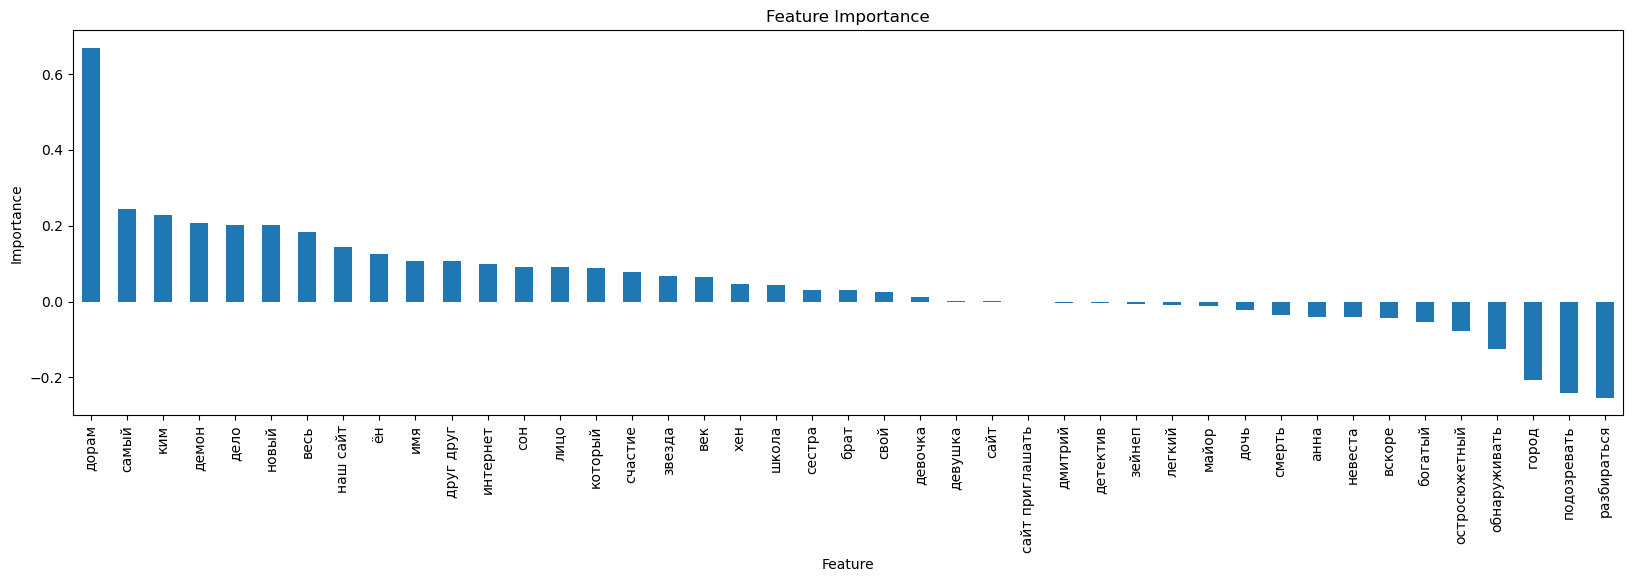

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

featureImportance = pd.DataFrame({"feature": train_data.columns[regressor.coef_!=0], 
                                  "importance": regressor.coef_[regressor.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)

featureImportance["importance"].plot(kind='bar', figsize=(20, 5));    
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()